# The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 batch

Author :- Ajinkya Pramod Chate

Task 2 :- Prediction using Unsupervised Machine Learning model

Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

DataSet can be downloaded from this link :- https://bit.ly/3kXTdox

Problem statement :- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Importing Required Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Dataset

In [3]:
flr2 = pd.read_csv('iris.csv')
flr2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

In [4]:
flr2.head() # Shows first Five Rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
flr2.tail() # Shows last Five Rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
flr2.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)

# Renaming the Columns as SepalLength, SepalWidth, PetalLength, PetalWidth

In [10]:
flr2['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)

In [11]:
flr2=flr2.drop("Id", axis=1) # Droping the column ID 

In [12]:
flr2.shape # Returns the shape in Tuple format 
# i.e (Rows/Colums) of Data variable

(150, 5)

# Checking Null Values

In [13]:
flr2.info() # Gives the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
flr2.describe() 
# Shows the Statistical Data like Mean, Percentile, Standard Deviation of numerical values of Data Frame, Minimum value, Mode


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
flr2.isna().sum() # Checks for Null value in the dataset

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# Data Visualization and Correlation Matrix

<AxesSubplot:>

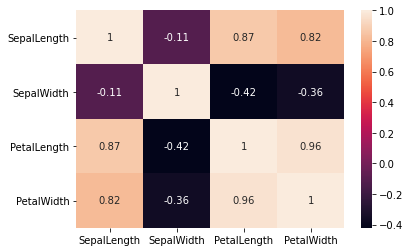

In [18]:
sns.heatmap(flr2.corr(),annot=True)

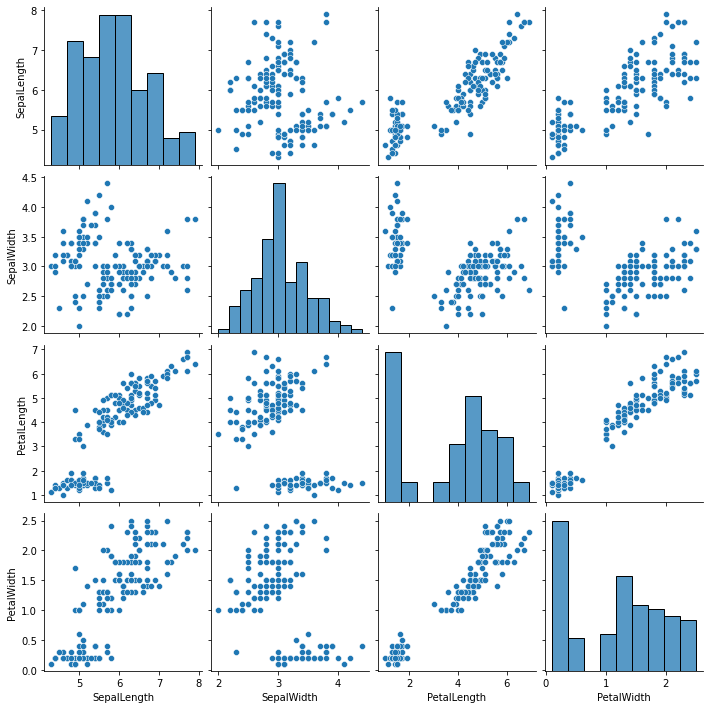

In [19]:
sns.pairplot(flr2)

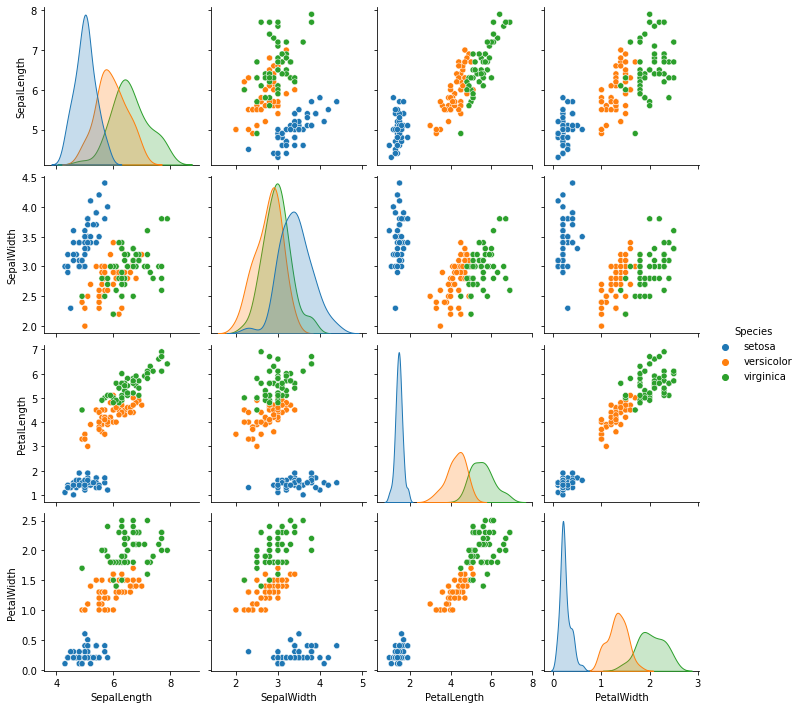

In [20]:
sns.pairplot(flr2,hue='Species')

In [21]:
x = flr2.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans 
# importing K-means library for un supervised ML Model

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting The Elbow Graph To Find Optimal Value Of 'K'

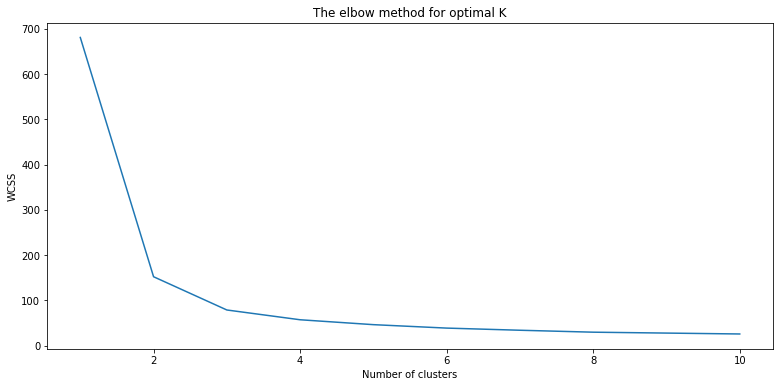

In [22]:
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-means Cluster when n_clusters = 5

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=3)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=5')

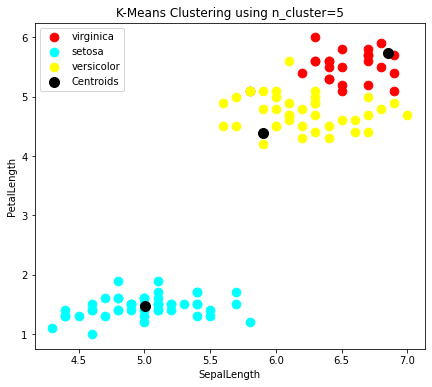

In [27]:
plt.figure(figsize=(7,6))
plt.scatter(flr2.iloc[y_kmeans==0,0],flr2.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(flr2.iloc[y_kmeans==1,0],flr2.iloc[y_kmeans==1,2],s=75,c='cyan',label='setosa')
plt.scatter(flr2.iloc[y_kmeans==2,0],flr2.iloc[y_kmeans==2,2],s=75,c='yellow',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=5')

# Applying K-Means cluster when n_clusters = 4

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=5)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 0 4 3 0 0 3 2 3 0 3 0
 0 0 4 0 0 0 3 3 4 0 4 3 4 0 3 4 4 0 3 3 3 0 4 4 3 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
[[6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.006      3.418      1.464      0.244     ]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=4')

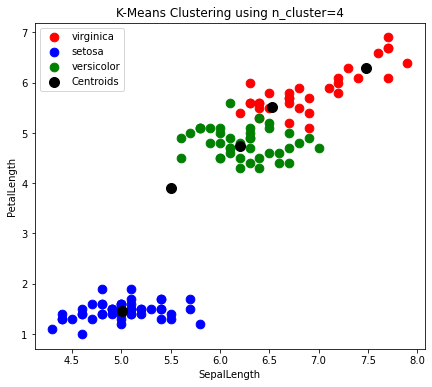

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(flr2.iloc[y_kmeans==0,0],flr2.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(flr2.iloc[y_kmeans==1,0],flr2.iloc[y_kmeans==1,2],s=75,c='blue',label='setosa')
plt.scatter(flr2.iloc[y_kmeans==2,0],flr2.iloc[y_kmeans==2,2],s=75,c='green',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=4')

# Applying K-Means cluster when n_clusters = 3

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=3)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=3')

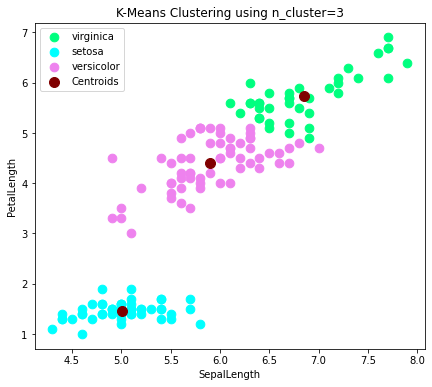

In [31]:
plt.figure(figsize=(7,6))
plt.scatter(flr2.iloc[y_kmeans==0,0],flr2.iloc[y_kmeans==0,2],s=75,c='springgreen',label='virginica')
plt.scatter(flr2.iloc[y_kmeans==1,0],flr2.iloc[y_kmeans==1,2],s=75,c='cyan',label='setosa')
plt.scatter(flr2.iloc[y_kmeans==2,0],flr2.iloc[y_kmeans==2,2],s=75,c='violet',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='maroon',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=3')

# After observing all the three graph with cluster 5,4, and 3 we say that the cluster with 3 is a much better in cluster formation as compared to the n_cluster = 4 and n_cluster=5